<a href="https://colab.research.google.com/github/sumaiyababar/Agentless-Security-Approach-For-Iot-Devices/blob/main/Logistic_Regression_of_attackcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/ICUDatasetProcessed .

In [3]:
import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

In [18]:
df1 = pd.read_csv('/content/drive/MyDrive/ICUDatasetProcessed/attack.csv')
df1.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto', 'ip.ttl',
       'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack',
       'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.synack',
       'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin',
       'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg',
       'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size', 'tcp.window_size_value',
       'tcp.checksum', 'mqtt.clientid', 'mqtt.clientid_len',
       'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.passwd',
       'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype',
       'mqtt.qos', 'mqtt.retain', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mqtt.willmsg_len', 'label'],
      dtype='object')

In [19]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['patientMonitoring.csv',
 'environmentMonitoring.csv',
 'attack.csv',
 'Attack.csv']

In [20]:
df1.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,ip.ttl,tcp.flags,...,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,label
0,0.000000,0.000000,78,192.168.1.90,192.168.1.91,55363,1883,6,64,0x00000002,...,0,0,0,0,0,0,0,0,0,1
1,0.026297,0.026297,66,192.168.1.91,192.168.1.90,1883,55363,6,128,0x00000012,...,0,0,0,0,0,0,0,0,0,1
2,0.000095,0.026392,54,192.168.1.90,192.168.1.91,55363,1883,6,64,0x00000010,...,0,0,0,0,0,0,0,0,0,1
3,0.000300,0.026692,68,192.168.1.90,192.168.1.91,55363,1883,6,64,0x00000018,...,12,0,1,0,0,0,0,4,0,1
4,0.001360,0.028052,60,192.168.1.91,192.168.1.90,1883,55363,6,128,0x00000018,...,2,0,2,0,0,0,0,0,0,1


In [21]:
#data cleaning
import pandas as pd

df1 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df1 = df1.append(df, ignore_index=True)
  print(f'df1.shape: {df1.shape}')

---- Reading patientMonitoring.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (76810, 52)
empty_cols: 0
[]
df1.shape: (76810, 52)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (108568, 52)
---- Reading attack.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (164850, 51)
empty_cols: 0
[]
df1.shape: (273418, 53)
---- Reading Attack.csv ----
df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (353544, 53)


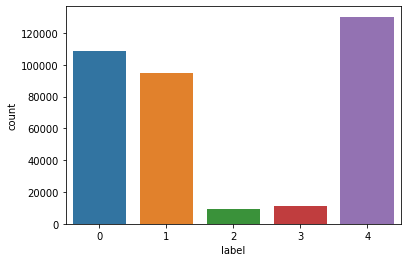

In [22]:
#Data Visualization

import seaborn as s
s.countplot(x='label',data=df1)

In [23]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags','class']

In [24]:
df1.drop(labels=feats, axis=1, inplace=True)
df1.shape

(353544, 42)

In [25]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [26]:
df1 = df1[fs2]
df1.shape

(353544, 11)

In [27]:
df1['label'].value_counts()

4    130223
0    108568
1     94627
3     10924
2      9202
Name: label, dtype: int64

In [28]:
x, y= make_classification(
    n_samples=230125,
    n_features=11,
    n_classes=5,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=4,
    n_redundant=0,
    n_repeated=0
)

In [29]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [30]:
x_train.shape

(172593, 11)

In [31]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [32]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='multinomial', n_jobs=1)

In [33]:

# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[-3.56522704e-01  8.57020724e-01 -3.66209846e-03  1.53949370e-03
  -6.59902153e-01 -6.26221586e-03 -1.50349607e+00 -6.35899511e-03
   1.64123311e-03 -2.48718998e-03 -8.17735116e-04]
 [ 2.12470180e+00  1.26033549e-01  2.07531335e-02 -1.59406410e-03
  -2.59833979e+00 -7.01700119e-03  4.85428634e-01 -7.21537031e-03
   1.08077610e-02  4.69065327e-03 -1.55561636e-02]
 [-1.64916234e-01 -9.82446637e-01  3.97389749e-03  6.39669005e-03
  -3.78501529e-01  4.55346520e-03  1.50452865e-01  7.61715969e-03
  -6.13255323e-03  2.43340628e-03  1.89389407e-03]
 [-8.53315512e-01  9.38312886e-01 -6.28925995e-03 -2.90467423e-03
   2.42903734e+00 -3.72286511e-04  4.80152378e-01  4.06999801e-03
  -3.04824110e-03 -1.08146313e-02  7.85742963e-03]
 [-7.49947346e-01 -9.38920522e-01 -1.47756725e-02 -3.43744541e-03
   1.20770613e+00  9.09803836e-03  3.87462196e-01  1.88720772e-03
  -3.26819981e-03  6.17776172e-03  6.62257504e-03]]
[ 0.45440483 -1.29808604  1.19320182 -0.78799402  0.43847342]


In [34]:
y_pred=log_reg.predict(x_test)

In [35]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[10020,   734,   272,   441,   123],
       [  427, 10234,   665,    60,    95],
       [  482,   351,  8568,  1093,   878],
       [  290,   147,   111,  9176,  1768],
       [  186,   525,  1406,   752,  8728]])

In [36]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.81217409441702 


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Accuracy is {} '.format(recall_score(y_test, y_pred,pos_label='positive',average='micro')))

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [44]:

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(x_train, y_train)
RF_prediction = RF.predict(x_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
AB_prediction = AB.predict(x_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(x_train, y_train)
LogR_prediction = LogR.predict(x_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(x_train, y_train)
DT_prediction = DT.predict(x_test)




--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [48]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accuracy','Precision', 'Recall','F1-Score'))

results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction,average='micro')*100,
                recall_score(y_test, KNN_prediction,average='micro')*100,
                f1_score(y_test, KNN_prediction,average='micro')*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction,average='micro')*100,
                recall_score(y_test,  RF_prediction,average='micro')*100,
                f1_score(y_test,  RF_prediction,average='micro')*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction,average='micro')*100,
                recall_score(y_test,  AB_prediction,average='micro')*100,
                f1_score(y_test,  AB_prediction,average='micro')*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction,average='micro')*100,
                recall_score(y_test,  LogR_prediction,average='micro')*100,
                f1_score(y_test,  LogR_prediction,average='micro')*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction,average='micro')*100,
                recall_score(y_test,  DT_prediction,average='micro')*100,
                f1_score(y_test,  DT_prediction,average='micro')*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'), ('KNN ', 84.25919488284781, 84.25919488284781, 84.25919488284781, 84.25919488284781), ('RF ', 85.75227699367308, 85.75227699367308, 85.75227699367308, 85.75227699367308), ('AB ', 72.18765208927206, 72.18765208927206, 72.18765208927206, 72.18765208927206), ('LogR ', 81.217409441702, 81.217409441702, 81.217409441702, 81.217409441702), ('DT ', 86.45449488980046, 86.45449488980046, 86.45449488980046, 86.45449488980046)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accuracy  Precision     Recall   F1-Score
2        KNN   84.259195  84.259195  84.259195  84.259195
3         RF   85.752277  85.752277  85.752277  85.752277
4         AB   72.187652  72.187652  72.187652  72.

In [49]:
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix AB_prediction')
print(confusion_matrix(y_test,AB_prediction))
print('Confusion Matrix LogR_prediction')
print(confusion_matrix(y_test,LogR_prediction))
print('Confusion Matrix DT_prediction')
print(confusion_matrix(y_test,DT_prediction))

Confusion Matrix KNN_prediction
[[10651   448   198   213    80]
 [  360 10513   430    56   122]
 [  487   513  8377   916  1079]
 [  128   160   470  9654  1080]
 [  113   535   946   722  9281]]
Confusion Matrix RF_prediction
[[10426   462   254   361    87]
 [  216 10475   655    58    77]
 [  384   230  8596  1081  1081]
 [   77   121   243  9811  1240]
 [  156   519   401   494 10027]]
Confusion Matrix AB_prediction
[[9880  569  501  558   82]
 [1339 8807 1064   68  203]
 [ 509  756 7478  824 1805]
 [ 853  342  260 8137 1900]
 [ 137  438  826 2967 7229]]
Confusion Matrix LogR_prediction
[[10020   734   272   441   123]
 [  427 10234   665    60    95]
 [  482   351  8568  1093   878]
 [  290   147   111  9176  1768]
 [  186   525  1406   752  8728]]
Confusion Matrix DT_prediction
[[10603   380   218   288   101]
 [  298 10572   403    71   137]
 [  341   407  8617   912  1095]
 [  107   114   271  9907  1093]
 [  126   370   526   535 10040]]
